In [1]:
cd D:\\Saarbrucken\\EDA_Research\\vae-disentanglement\\disentanglement_lib_pl

D:\Saarbrucken\EDA_Research\vae-disentanglement\disentanglement_lib_pl


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns

import torch
import torchvision.utils as vutils
import torchvision.transforms.functional as T
from torch.utils.data import DataLoader
from torchvision import transforms

from common.utils import CenteredNorm
from common import dag_utils
# Change figure aesthetics
%matplotlib inline
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 1.5})
np.set_printoptions(suppress=True,precision=4)

In [24]:
X, Y = np.random.randn(500), np.random.randn(500)
color_labels = np.random.choice(range(5), 500)

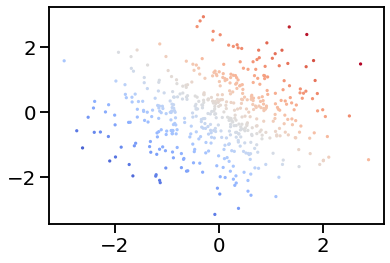

In [28]:
plt.scatter(X, Y, cmap='YlGn', c=X + Y, norm=CenteredNorm(), s=3)

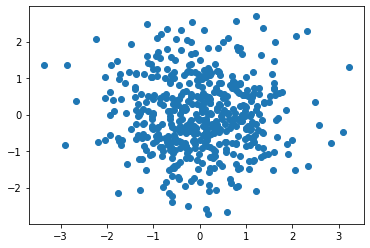

In [10]:
plt.scatter(X, Y)

In [3]:
dag_utils.get_mask_for_intermediate_to_output(interm_unit_dim=3, output_dim=4)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [36]:
def get_mask_intermediate_to_intermediate(out_group_dim, in_out_groups, in_group_dim):
    """
    Generate weight matrix mask for intermediate layers on DAGInteractionLayer

    Parameters
    ----------
    out_group_dim: Number of units in a group for layer before output
    in_out_groups: Number of input and output groups
    in_group_dim: Number of units in a group for layer after input
    
    Returns
    -------
    M : 2-D array of shape (in_group_dim * in_out_groups, out_group_dim * in_out_groups) 
    representing the mask
    """

    from itertools import product
    M = np.zeros((in_out_groups * in_group_dim, out_group_dim * in_out_groups), dtype=np.float32)
    C = np.array_split(range(out_group_dim * in_out_groups), in_out_groups) 
    R = np.array_split(range(in_group_dim * in_out_groups), in_out_groups) 
    
    for r,c in zip(R,C):
        for p in product(r,c): 
            M[p] = 1.0

    return M

In [38]:
get_mask_intermediate_to_intermediate(1, 4, 3)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [39]:
get_mask_intermediate_to_intermediate(2, 4, 3)

array([[1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.]], dtype=float32)